# Tarea 7: Sobre los tipos de creatividad según Margaret Boden y el primer Perceptrón

## 1. Busca ejemplos de diferentes tipos de creatividad según la científica cognitiva Margaret Boden,  los cuales corresponden a: Creatividad exploratoria, por combinación y creatividad transformadora. 
Referencia bibliográfica: MARGARET, BODEN. La mente creativa. Mitos y Mecanismos Edit. Gedisa. Barcelona, 1994).

### A. Creatividad exploratoria

* Un diseñador gráfico que combina elementos de diferentes estilos artísticos para crear una estética visual única y original en una campaña publicitaria.

* Un científico que utiliza principios de la biología y la ingeniería para diseñar nuevos dispositivos médicos que imitan funciones biológicas y mejoran los tratamientos médicos existentes.

* Un chef que fusiona ingredientes y técnicas culinarias de diferentes culturas para crear platos únicos y deliciosos que nunca se han visto antes.

### B. Creatividad por combinación

* Un músico que fusiona géneros musicales diferentes, como el jazz y el hip-hop, creando un estilo musical único y innovador.

* Un inventor que combina tecnologías existentes de diferentes industrias para desarrollar un dispositivo revolucionario que soluciona un problema específico.

* Un diseñador de moda que mezcla diferentes telas, estampados y estilos de prendas para crear una colección de ropa que rompe con las convenciones y sorprende a la audiencia.

### C. Creatividad transformadora

* Un artista que desarrolla una nueva técnica artística que desafía las convenciones establecidas y abre nuevas posibilidades de expresión creativa.

* Un líder empresarial que introduce un modelo de negocio innovador que cambia la forma en que se aborda un determinado sector, rompiendo con las prácticas tradicionales y generando un impacto transformador en la industria.

* Un diseñador de productos que desarrolla un enfoque radicalmente diferente para abordar un problema de diseño, generando soluciones innovadoras que desafían las expectativas existentes.

## 2. Menciona ejemplos aplicados de IA  existentes en la actualidad sobre estos tipos de creatividad.

* Un experimento que combina diferentes técnicas de IA permite distingir los ojos de hombres y mujeres. Los resultados del experimiento demuestran que el modelo clasifica correctamente a hombres y mujeres sólo con imégenes de sus ojos, sin embargo, no se sabe qué criterios usa para realizar esta clasificación. https://hipertextual.com/2022/03/deep-learning-fondo-ojo-hombre-mujer

* Chat GPT, combina procesamiento de lenguaje natural, computación visual y otras ramas IA para crear un modelo capaz de resolver problemas y consultas en múltiples áreas de conocimiento.

* Conducción automática. La conducción automática de Tesla, utilizaba diferentes modelos de IA para generar los parámetros requeridos para su conducción autónoma. Este sistema fue transformado incluyendo nuevos modelos y el usu de memoria para construir un mapa digital de su entorno y mejorar la toma de decisiones durante la conducción.

## 3. Respecto al primer Perceptrón, averigua y comprende un poco la conexión entre el modelo planteado teórico y la máquina física hecha. ¿Qué tipo de problemas resolvía el Mark I Perceptrón?

Este perceptrón era capaz de clasificar imágenes de forma binaria, por lo que la salida únicamente podría clasificar entre 2 opciones. Podía resolver problemas parapara clasificar imágenes de hombres y mujeres, diferenciar dígitos escritos a mano.


## 4. De acuerdo al punto anterior,  realice un ejemplo de red neuronal, usando Tensorflow, que lo ilustre.

El siguiente código está basado en los siguientessitios web:
* https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
* https://www.kaggle.com/code/rivals16/gender-classification-inceptionv3

In [19]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Librerias de ayuda
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [152]:
train_images = tf.keras.utils.image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32)

val_images = tf.keras.utils.image_dataset_from_directory(
    './data',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32)

test_images = tf.keras.utils.image_dataset_from_directory(
    './Test',
    seed=123,
    image_size=(150, 150))

Found 3330 files belonging to 2 classes.
Using 2664 files for training.
Found 3330 files belonging to 2 classes.
Using 666 files for validation.
Found 4 files belonging to 2 classes.


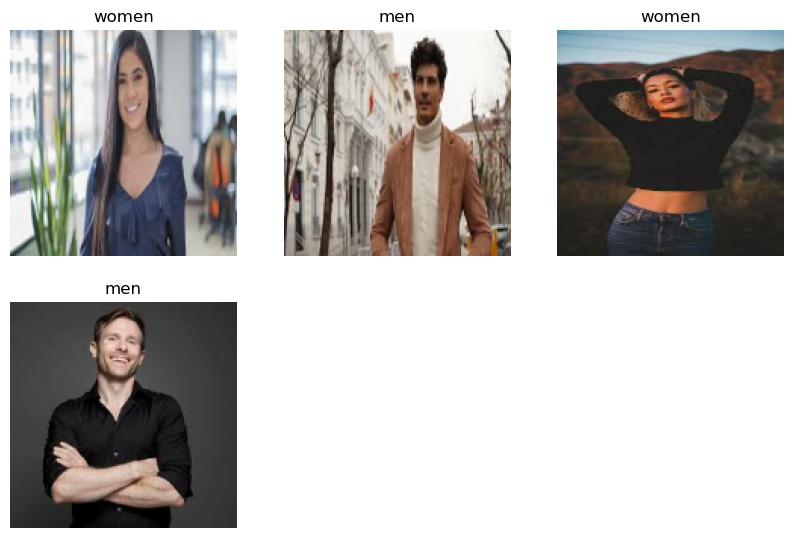

In [159]:
class_names = train_images.class_names

plt.figure(figsize=(10, 10))
for images, labels in test_images.take(1):
    for i in range(4):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [62]:
model = keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    keras.layers.Flatten(input_shape=(150, 150, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [63]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.fit(train_images, epochs=10, validation_data=val_images )

Epoch 1/10
84/84 [==============================] - 11s 126ms/step - loss: 13.6120 - accuracy: 0.5349 - val_loss: 5.1765 - val_accuracy: 0.6051
Epoch 2/10
84/84 [==============================] - 11s 124ms/step - loss: 3.8178 - accuracy: 0.5980 - val_loss: 2.6639 - val_accuracy: 0.6021
Epoch 3/10
84/84 [==============================] - 11s 122ms/step - loss: 6.1136 - accuracy: 0.5526 - val_loss: 6.1655 - val_accuracy: 0.4760
Epoch 4/10
84/84 [==============================] - 11s 124ms/step - loss: 2.1001 - accuracy: 0.6254 - val_loss: 2.9714 - val_accuracy: 0.4745
Epoch 5/10
84/84 [==============================] - 11s 121ms/step - loss: 1.5475 - accuracy: 0.6363 - val_loss: 1.1233 - val_accuracy: 0.6276
Epoch 6/10
84/84 [==============================] - 11s 122ms/step - loss: 1.7035 - accuracy: 0.6468 - val_loss: 5.7759 - val_accuracy: 0.5811
Epoch 7/10
84/84 [==============================] - 11s 121ms/step - loss: 1.7690 - accuracy: 0.6423 - val_loss: 1.0096 - val_accuracy: 0.636

In [153]:
predictions = model.predict(test_images)

print(predictions)

print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 11ms/step
[[0.79250133 0.7273428 ]
 [0.65204906 0.9611304 ]
 [0.86878484 0.68091017]
 [0.46421474 0.89881504]]
0


1/1 [==============================] - 0s 20ms/step
[0.79250133 0.7273428 ]


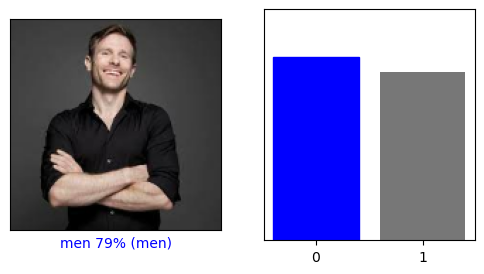

In [158]:

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    print(predictions_array)
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.numpy().astype("uint8"))

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(2))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

for images, labels in test_images.take(1):
    #print(images)
    i=0;
    predictions = model.predict(images)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, labels, images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions,  labels)

    plt.show()